In [1]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import mysql.connector
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
user_name = "root"
password = "Apple@12"

In [4]:
connection = mysql.connector.connect(host ='localhost',
                            user = user_name,
                            password = password,
                            db ='dma_final',auth_plugin='mysql_native_password')

In [5]:
connection

In [6]:
student_connect = pd.read_sql_query('Show tables from dma_final',connection)

C:\Users\mraka\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
student_connect

,Tables_in_dma_final
0,application
1,classroom
2,course
3,department
4,housingandfood
5,messages
6,professor
7,student
8,teaching_assistant
9,universityandcollege


In [8]:
query1 = pd.read_sql_query('select count(studentid),zipcodepref from housingandfood where studentid in(select distinct(studentid) from housingandfood where STUDENTID IN (select studentid from student where studentid in (select studentid from application where departmentid like "%AST%"))) group by zipcodepref',connection)

C:\Users\mraka\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [9]:
query1

,count(studentid),zipcodepref
0,6,2216
1,2,2118
2,8,2215
3,6,2115
4,3,2116


C:\Users\mraka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '6'),
 Text(0, 0, '2'),
 Text(0, 0, '8'),
 Text(0, 0, '6'),
 Text(0, 0, '3')]

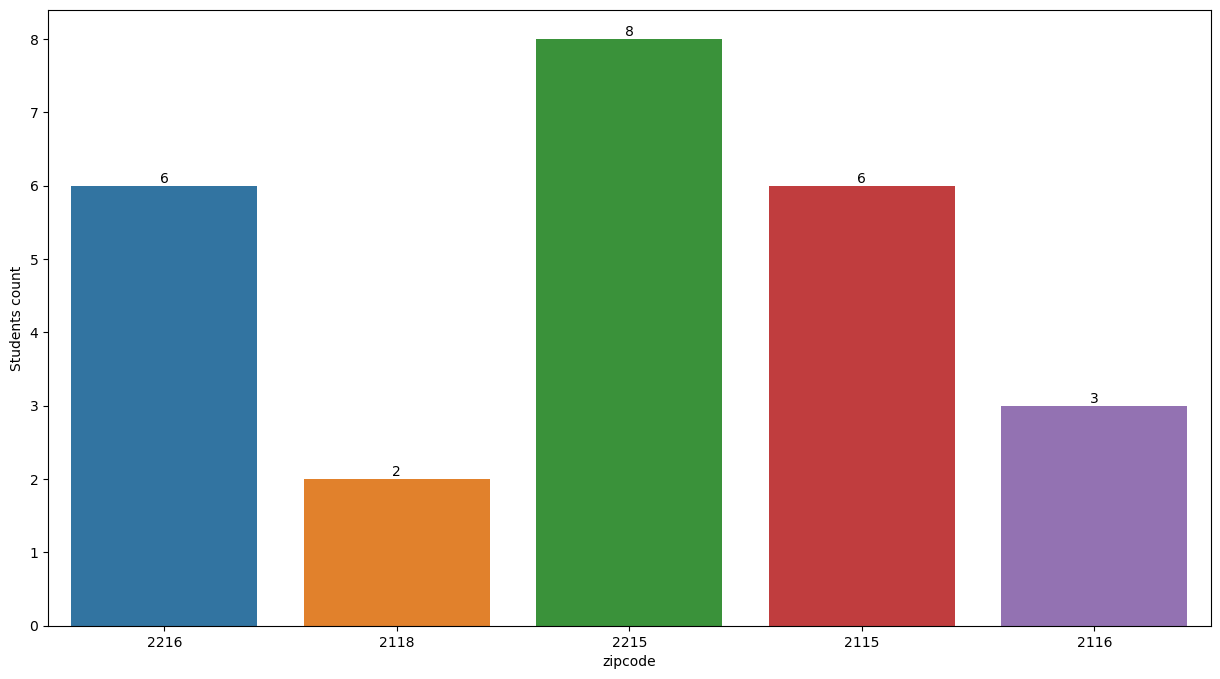

In [10]:
plt.figure(figsize=(15,8))
ax = sns.barplot(query1['zipcodepref'],query1['count(studentid)'],data=query1, ci=None)
ax.set(ylabel='Students count', xlabel='zipcode')
ax.bar_label(ax.containers[0])

In [11]:
query2 = pd.read_sql_query('SELECT zipcodepref as ZIP_CODE, COUNT(CASE WHEN rentpreference < 500 THEN 1 else NULL END ) as ECONOMICAL,COUNT(CASE WHEN rentpreference >=500 AND rentpreference <= 700 THEN 1 else NULL END ) as BUDGET_FRIENDLY,COUNT(CASE WHEN rentpreference >700 THEN 1 else NULL END  ) as LUXURY,COUNT(1) as total_students FROM housingandfood group by zipcodepref order by total_students DESC;',connection)

C:\Users\mraka\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [12]:
query2

,ZIP_CODE,ECONOMICAL,BUDGET_FRIENDLY,LUXURY,total_students
0,2215,3,64,30,97
1,2216,2,57,13,72
2,2115,2,45,15,62
3,2116,0,30,0,30
4,2118,0,30,0,30


In [13]:

query2.drop('total_students',axis=1,inplace=True)

In [14]:
query2 = query2.set_index('ZIP_CODE')

In [15]:
query2

,ECONOMICAL,BUDGET_FRIENDLY,LUXURY
ZIP_CODE,,,
2215,3,64,30
2216,2,57,13
2115,2,45,15
2116,0,30,0
2118,0,30,0


array([<AxesSubplot:ylabel='2215'>, <AxesSubplot:ylabel='2216'>,
       <AxesSubplot:ylabel='2115'>, <AxesSubplot:ylabel='2116'>,
       <AxesSubplot:ylabel='2118'>], dtype=object)

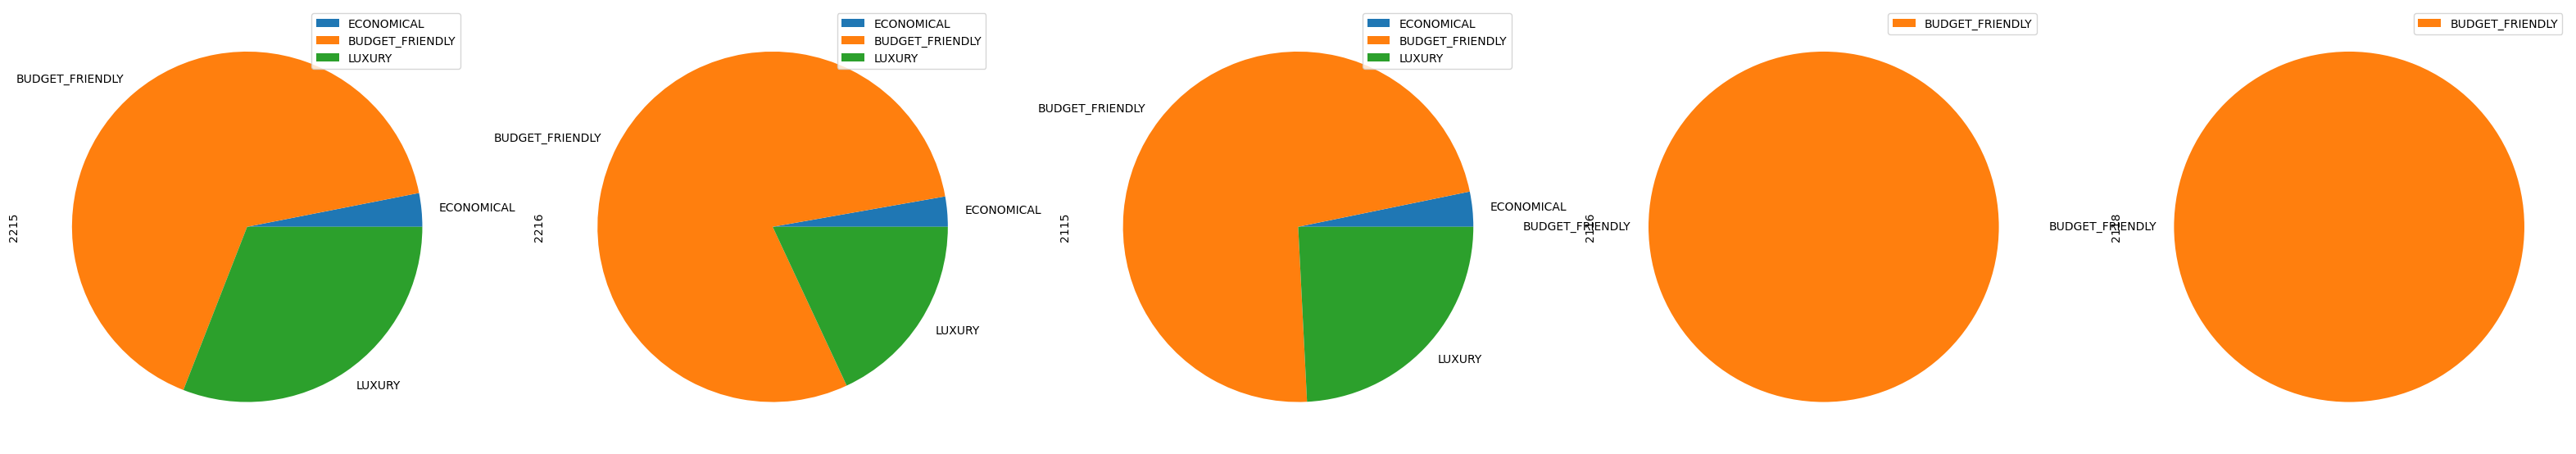

In [16]:
query2.T.plot.pie(subplots=True, figsize=(40, 100))

In [17]:
#plt.figure(figsize=(15,8))
#ax1 = sns.barplot(query2['housetype'],query2['studentcount'],data=query2, ci=None)
#ax1.set(ylabel='Student count', xlabel='HouseType')
#ax1.bar_label(ax1.containers[0])

In [18]:
query3 = pd.read_sql_query('select col.collegename,studentcount_table.student_count from universityandcollege col join (select count(studentid)as student_count,collegeid  from application where collegeid in (select collegeid from universityandcollege where campus = "boston") group by collegeid)as studentcount_table on col.collegeid = studentcount_table.collegeid group by col.collegename;',connection)

C:\Users\mraka\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [19]:
query3

,collegename,student_count
0,"College of Arts, Media and Design",35
1,Khoury College of Computer Sciences,32
2,College of Engineering,34
3,College of Science,26


C:\Users\mraka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '35'), Text(0, 0, '32'), Text(0, 0, '34'), Text(0, 0, '26')]

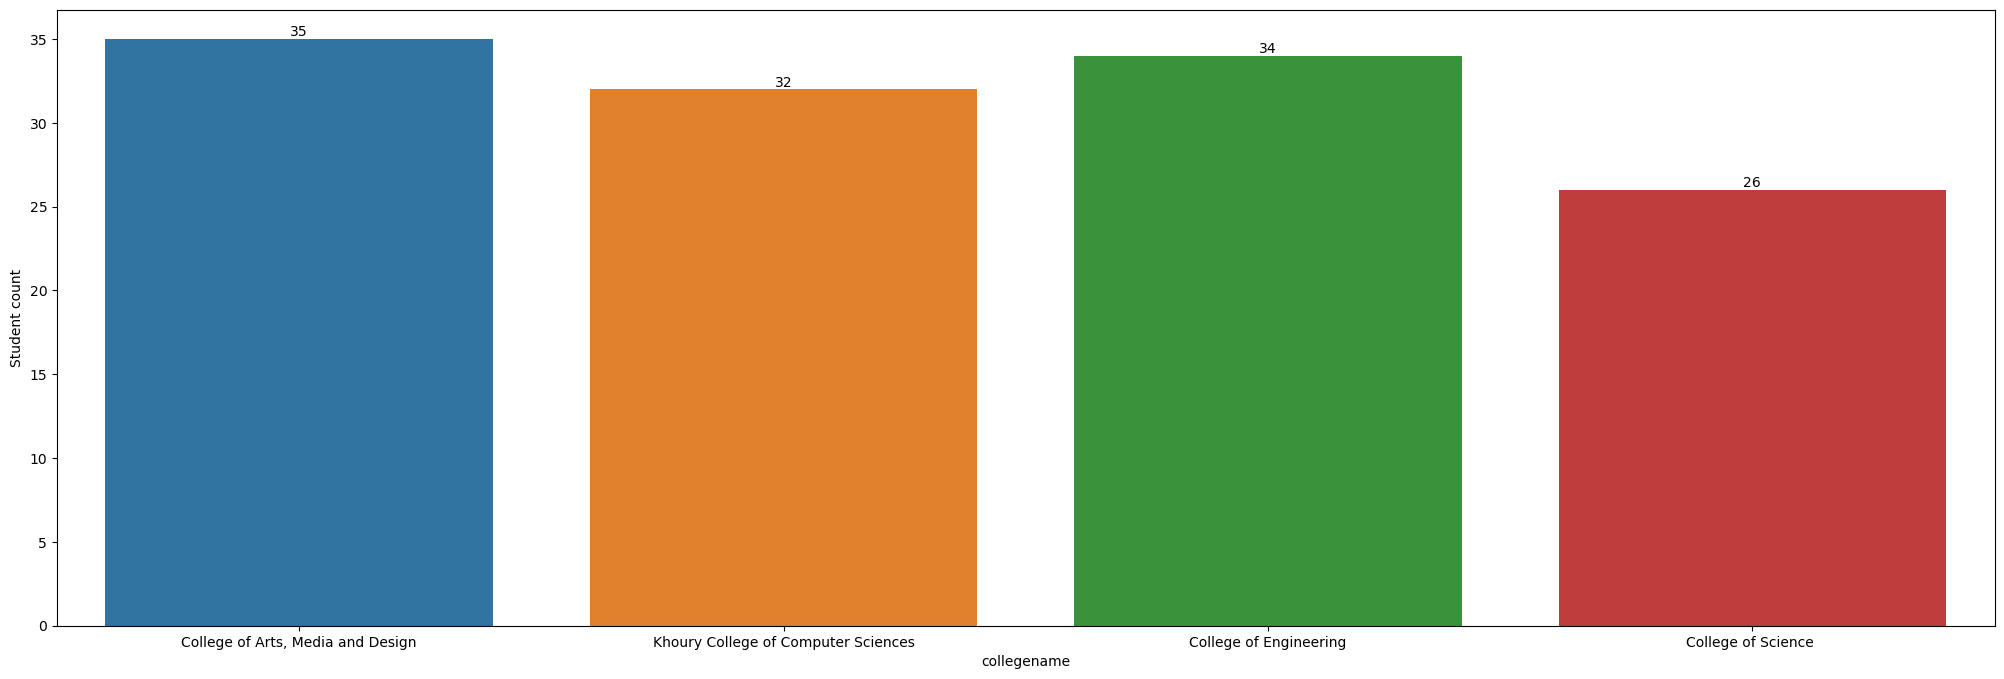

In [20]:
plt.figure(figsize=(25,8))
ax2 = sns.barplot(query3['collegename'],query3['student_count'],data=query2, ci=None)
ax2.set(ylabel='Student count', xlabel='collegename')
ax2.bar_label(ax2.containers[0])